# Numpy与机器学习

## 线性回归

$$\hat y=\theta^T x$$

$\theta\in \mathbb{R}^{n\times1}$ $x\in \mathbb{R}^{n\times1}$

$$Y=X\theta$$

$X\in \mathbb{R}^{m\times n}$

### 最小二乘：
$\hat \theta = \min_\theta L(\theta)=\min_\theta \frac{1}{m}\sum_{i=1}^m (y^{(i)}-\theta^Tx^{(i)})^2$

正态分布：$y\sim\mathcal{N}(\mu,\sigma^2)\rightarrow p(y)=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(y-\mu)^2}{2\sigma^2})$

- 测量是正态分布
- 每个样本间相互独立

$$lh(\theta;\mathcal{D})=\prod_{i=1}^mp(y^{(i)};\theta,x^{(i)})\propto\prod_{i=1}^m \exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$$

$$\log lh(\theta;\mathcal{D})=-\sum_{i=1}^m \frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}\propto-\frac{1}{m}\sum_{i=1}^m (y^{(i)}-\theta^Tx^{(i)})^2$$

### 学习－正规方程
$$\epsilon = Y-X\theta$$
$$L\propto\epsilon^T\epsilon = (Y-X\theta)^T(Y-X\theta)= Y^TY - (X\theta)^TY - Y^T(X\theta) + (X\theta)^T(X\theta)= Y^TY - 2Y^TX\theta + \theta^TX^TX\theta$$

$$\frac{\partial}{\partial \theta}\epsilon^T\epsilon= - 2X^TY + 2X^TX\theta = 0$$
$$X^TX\theta=X^TY$$
$$\theta = (X^TX)^{-1}X^TY = X^+Y$$
正规方程（Normal Equation）
$X^+=(X^TX)^{-1}X^T$

4.766391037960545 4.521882512489361


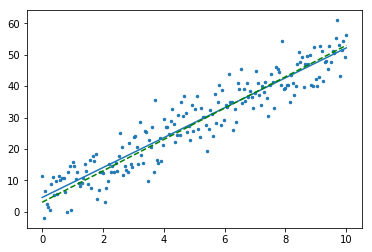

In [103]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,10,200)
y = 5 * x + 3 + 5*np.random.randn(200)

x = x.reshape(-1,1)
X = np.matrix(np.insert(x,0,1,axis=1))
Y = np.matrix(y.reshape(-1,1))

# normal equation
theta = (X.T * X).I * X.T * Y
b,a = theta
a = float(a); b = float(b)
print(a,b)
plt.scatter(x,y,s=6)
plt.plot([0,10],[b,b+10*a])
plt.plot([0,10],[3,5*10+3],'g--')
plt.show()

### 学习－梯度下降

$$\frac{\partial}{\partial \theta}L\propto \frac{1}{m}X^T(X\theta-Y)$$

$$\theta:=\theta-\alpha\frac{\partial}{\partial \theta}L$$


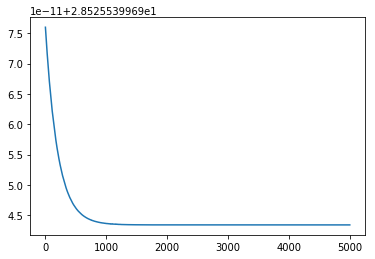

[[ 3.38963176]
 [ 5.0009445 ]]


In [91]:
theta = np.matrix(np.zeros((2,1)))
# theta = np.matrix([[5],[3]])
alpha = 0.01

Loss = []
for i in range(10000):
    L = float((Y-X*theta).T*(Y-X*theta)/200)
    Loss.append(L)
    grad = X.T*(X*theta-Y)/200
    theta = theta - alpha * grad
plt.plot(Loss[5000:])
plt.show()
print(theta)

In [104]:
from sklearn import linear_model
reg = linear_model.LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

[ 4.76639104]
4.52188251249
